In [24]:
import pandas as pd
import numpy as np

#The titantic survivors data set

data = pd.read_csv('https://hbiostat.org/data/repo/titanic3.csv')

In [25]:
# check size and types
print(f'Shape: {data.shape}')
data.dtypes

Shape: (1309, 14)


pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

<AxesSubplot:xlabel='survived', ylabel='fare'>

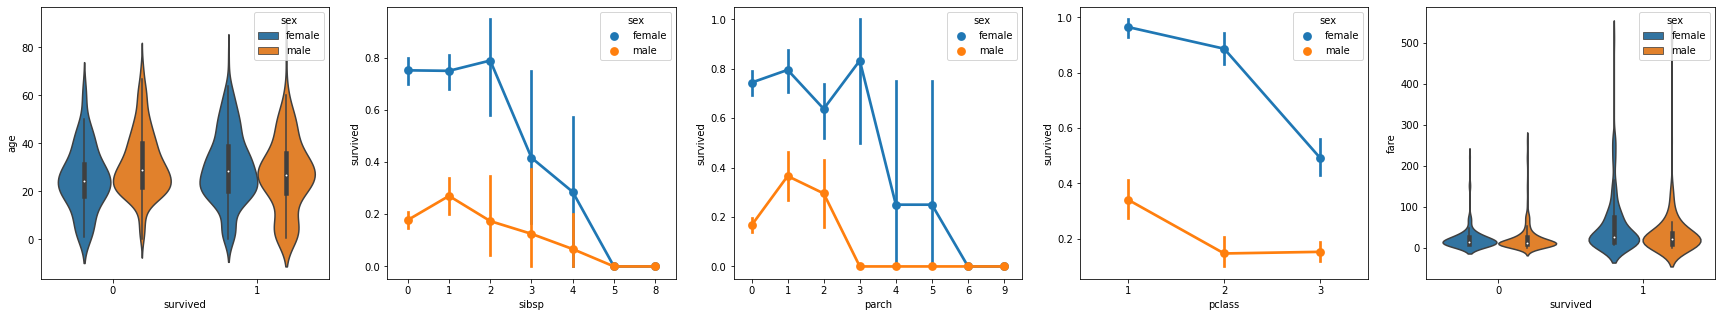

In [26]:
# view how some fields realte to survivability

import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [27]:
# Convert gener to 1/0

data.replace({'male': 1, 'female': 0}, inplace=True)

# correlation between input variables

data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [32]:
# keep some features  - drop sibsp and parch features, dro precords with missing data 
data = data[['sex', 'pclass','age','fare','survived']].dropna()
# check size and types
print(f'Shape: {data.shape}')

Shape: (1045, 5)


In [33]:
# split training and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','fare']], data.survived, test_size=0.2, random_state=0)

In [34]:
# Normalize, notice we normalize the test data as well for the testing at the end

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

Pick a Scikit-learn Mdoel, see this helper chart
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [35]:
# Pick a model, tutorial uses Naive Bayes ALgorithm


from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [36]:
# check accuracy against test data

from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7799043062200957


Use a Neural Network

In [38]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential(
    [
        Dense(4, activation = 'relu', input_dim = 4),
        Dense(4, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 731us/step - loss: 0.9593 - accuracy: 0.4175
Epoch 2/50
27/27 [==============================] - 0s 731us/step - loss: 0.8732 - accuracy: 0.4211
Epoch 3/50
27/27 [==============================] - 0s 731us/step - loss: 0.8134 - accuracy: 0.4199
Epoch 4/50
27/27 [==============================] - 0s 731us/step - loss: 0.7729 - accuracy: 0.3947
Epoch 5/50
27/27 [==============================] - 0s 808us/step - loss: 0.7421 - accuracy: 0.4175
Epoch 6/50
27/27 [==============================] - 0s 770us/step - loss: 0.7195 - accuracy: 0.4450
Epoch 7/50
27/27 [==============================] - 0s 770us/step - loss: 0.7024 - accuracy: 0.5191
Epoch 8/50
27/27 [==============================] - 0s 808us/step - loss: 0.6888 - accuracy: 0.5766
Epoch 9/50
27/27 [==============================] - 0s 808us/step - loss: 0.6777 - accuracy: 0.6112
Epoch 10/50
27/27 [==============================] - 0s 731us/step - loss: 0.6679 - accuracy: 0.6423

In [40]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 0s 834us/step
0.6124401913875598


Logistic Regression from Coursera


In [69]:
# convert y_train to numpy to get the functions to work from my Coursera courses

y_train = y_train.to_numpy()

In [70]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[ 0.77558531 -1.38929364  0.33282539 -0.19320277]
 [ 0.77558531  0.96420075 -0.50973013 -0.52977111]
 [-1.28934882 -0.21254644 -0.79058197 -0.20307323]
 [-1.28934882 -1.38929364  2.29878827  3.31043739]
 [ 0.77558531  0.96420075 -0.57994309 -0.5395662 ]]
Type of X_train: <class 'numpy.ndarray'>


In [71]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [1 1 1 0 0]
Type of y_train: <class 'numpy.ndarray'>


In [72]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (836, 4)
The shape of y_train is: (836,)
We have m = 836 training examples


In [73]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    g = 1/(1+np.exp(-z))
    
    return g

In [74]:

def compute_cost(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (array_like Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : (array_like Shape (n,)) Values of bias parameter of the model
      lambda_ : (scalar, float)    Controls amount of regularization
    Returns:
      total_cost: (scalar)         cost 
    """
    m, n = X.shape
    

    # FIRST CALCULATE COST WITHOUT REGULARIZATION

    cost = 0.
    
    for i in range(m):
        z_i = np.dot(X[i], w) + b                                      #(n,)(n,)=scalar, see np.dot
        f_wb_i = sigmoid(z_i)                                          #scalar
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)      #scalar
             
    cost = cost/m

    # calculate COST OF REGULARIZATION
    reg_cost = 0.

    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
        
    ### END CODE HERE ### 
    
    # Add the regularization cost to get the total cost
    total_cost = cost + (lambda_/(2 * m)) * reg_cost

    return total_cost

In [76]:
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    # for i in range(m):
    #    z_wb = None
    #    for j in range(n): 
    #        z_wb += None
    #    z_wb += None
    #    f_wb = None
    #    
    #    dj_db_i = None
    #    dj_db += None
    #    
    #    for j in range(n):
    #        dj_dw[j] = None
    #        
    #dj_dw = None
    #dj_db = None

    # From : Course 1 Week 3 Lab 9

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    # Regularization Penalty

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j] 
    
    ### END CODE HERE ###
    
    return dj_db, dj_dw

In [77]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% np.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [79]:
# Train - pick some starter values

np.random.seed(1)
initial_w = 0.01 * (np.random.rand(4).reshape(-1,1) - 0.5)

initial_b = -1


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.73   
Iteration 1000: Cost     0.62   
Iteration 2000: Cost     0.57   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.49   
Iteration 7000: Cost     0.49   
Iteration 8000: Cost     0.48   
Iteration 9000: Cost     0.48   
Iteration 9999: Cost     0.48   


In [80]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   

        z_wb = np.dot(X[i], w) + b                                      #(n,)(n,)=scalar, see np.dot
        f_wb = sigmoid(z_wb) 
        
        # Apply the threshold
        p[i] = 1 if f_wb >= 0.5 else 0
        
    ### END CODE HERE ### 
    return p

In [92]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

#Compute accuracy on our test set
p = predict(X_test, w,b)
print('Test Accuracy: %f'%(np.mean(p == y_test) * 100))



Train Accuracy: 77.870813
Test Accuracy: 79.904306


In [93]:
# Try using  svc (suuport vector classification as the scikit-learn chart recommends)

from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print('Test Accuracy: %f'%(np.mean(y_pred == y_test) * 100))

0.8133971291866029
Test Accuracy: 81.339713


In [97]:
# the scikit-learn logistic regression according to Coursera:

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


print("Accuracy on training set:", lr_model.score(X_train, y_train))
print("Accuracy on test set:", lr_model.score(X_test, y_test))



Accuracy on training set: 0.7822966507177034
Accuracy on test set: 0.8038277511961722


Precision: 0.7702702702702703
Recall: 0.7037037037037037


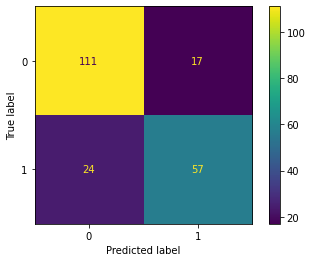

In [113]:
y_pred=lr_model.predict(X_test)


from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_pred).ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
print("Precision:", precision)
print("Recall:", recall)


In [130]:
from eli5 import explain_weights

explain_weights(lr_model)


Weight?,Feature
+0.047,x3
-0.462,<BIAS>
-0.494,x2
-0.960,x1
-1.200,x0


In [132]:
from eli5 import show_prediction

import random

rand = random.randint(1, len(X_test))

# convert from series to numy array
# y_test = y_test.to_numpy()

print("Features: ", X_test[rand])
print("Actual Target Value : ", y_test[rand])

show_prediction(lr_model, X_test[rand], show_feature_values=True)


Features:  [ 0.77558531 -1.38929364 -0.43951717  3.77240366]
Actual Target Value :  0
